# Introducción al Aprendizaje Automatizado: Trabajo Práctico N° 3
## Natalia Mellino

In [2]:
# imports
from sklearn.naive_bayes import GaussianNB
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import warnings
import pickle
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

from ej4tp1 import ej4tp1, generate_dataframe_a, generate_dataframe_b
from dimensionalidad_ann import dim_ann
from espirales_anidadas import generate_points_c

## Ejercicio 1: Dimensionalidad

In [19]:
def ej1():
    ds = [2, 4, 6, 8, 16, 32]

    test_errors_a = []
    test_errors_b = []
    train_errors_a = []
    train_errors_b = []

    dd = []
    for d in ds:
        for i in range(0, 20):
            dd.append(d)
            cols = list(map(str, list(range(0, d))))
            # Generamos el conjunto de testeo
            test_a = generate_dataframe_a(d = d, n = 10000, C = 0.78)
            test_set_a = test_a.loc[ : , cols ]
            y_test_set_a = test_a.loc[:, 'Class']

            test_b = generate_dataframe_b(d = d, n = 10000, C = 0.78)
            test_set_b = test_b.loc[ : , cols ]
            y_test_set_b = test_b.loc[:, 'Class']
            # Generamos el conjunto de entrenamiento
            train_set_a = generate_dataframe_a(d = d, n = 250, C = 0.78)
            train_set_b = generate_dataframe_b(d = d, n = 250, C = 0.78)

            # Creamos el árbol y lo entrenamos
            Xtrain_a, ytrain_a = train_set_a.loc[ : , cols ], train_set_a.loc[:, 'Class']

            clf_a = GaussianNB()
            clf_a.fit(Xtrain_a, ytrain_a)

            Xtrain_b, ytrain_b = train_set_b.loc[ : , cols ], train_set_b.loc[:, 'Class']
            clf_b = GaussianNB()
            clf_b.fit(Xtrain_b, ytrain_b)

            # Predecimos sobre el conjunto de testeo
            prediction_a = clf_a.predict(test_set_a)
            prediction_b = clf_b.predict(test_set_b)
            prediction_train_a = clf_a.predict(train_set_a.loc[ : , cols])
            prediction_train_b = clf_b.predict(train_set_b.loc[ : , cols])

            # Guardamos el error (1 - accuracy) sobre el conjunto de testeo
            # y el de entrenamiento.
            test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
            test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))
            train_errors_a.append(1 - accuracy_score(train_set_a.loc[:, 'Class'], prediction_train_a))
            train_errors_b.append(1 - accuracy_score(train_set_b.loc[:, 'Class'], prediction_train_b))

    # Creamos los dataframes con cada valor de C y su respectivo error (20 errores por cada N habrá)
    df_a = pd.DataFrame({})
    df_a['d'] = dd
    df_a['Test Error'] = test_errors_a
    df_a['Train Error'] = train_errors_a

    df_b = pd.DataFrame({})
    df_b['d'] = dd
    df_b['Test Error'] = test_errors_b
    df_b['Train Error'] = train_errors_b

    # Agrupamos y calculamos el promedio de error para cada valor de C
    mean_test_error_a = df_a.groupby('d')['Test Error'].mean().to_numpy()
    mean_test_error_b = df_b.groupby('d')['Test Error'].mean().to_numpy()
    mean_train_error_a = df_a.groupby('d')['Train Error'].mean().to_numpy()
    mean_train_error_b = df_b.groupby('d')['Train Error'].mean().to_numpy()
    # Guardamos los resultados obtenidos en los dataframes
    error_df_a = pd.DataFrame({})
    error_df_a['d'] = ds
    error_df_a['Test Error'] = mean_test_error_a
    error_df_a['Train Error'] = mean_train_error_a

    error_df_b = pd.DataFrame({})
    error_df_b['d'] = ds
    error_df_b['Test Error'] = mean_test_error_b
    error_df_b['Train Error'] = mean_train_error_b

    return (error_df_a, error_df_b)


In [20]:
# Corremos el ejercicio y obtenemos los errores para bayes
error_diag, error_paral = ej1()


In [21]:
# Traemos los resultados de árboles

# Obtenemos los resultados del trabajo de árboles
ad_error_diag, ad_error_paral = ej4tp1()

In [22]:
# Traemos los resultados de redes neuronales
ann_error_diag, ann_error_paral = dim_ann()

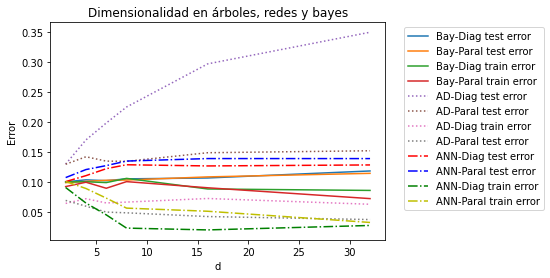

In [23]:
# Bayes
plt.plot(error_diag['d'], error_diag['Test Error'], label='Bay-Diag test error')
plt.plot(error_paral['d'], error_paral['Test Error'], label='Bay-Paral test error')
plt.plot(error_diag['d'], error_diag['Train Error'], label='Bay-Diag train error')
plt.plot(error_paral['d'], error_paral['Train Error'], label='Bay-Paral train error')

# Arboles
plt.plot(ad_error_diag['d'],  ad_error_diag['Test Error'], label='AD-Diag test error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Test Error'], label='AD-Paral test error', linestyle=":")
plt.plot(ad_error_diag['d'],  ad_error_diag['Train Error'], label='AD-Diag train error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Train Error'], label='AD-Paral test error', linestyle=":")

# Acá pondría mis redes... SI TAN SOLO LAS HUBIERA GUARDADO
cols = ['d', 'Test Error', 'Train Error']
ann_error_diag = pd.read_csv('ann/diag_error.csv', names=cols)
ann_error_paral = pd.read_csv('ann/paral_error.csv', names=cols)
plt.plot(ann_error_diag['d'],  ann_error_diag['Test Error'],'r',    label='ANN-Diag test error', linestyle="-.")
plt.plot(ann_error_paral['d'], ann_error_paral['Test Error'], 'b',  label='ANN-Paral test error', linestyle="-.")
plt.plot(ann_error_diag['d'],  ann_error_diag['Train Error'], 'g',  label='ANN-Diag train error', linestyle="-.")
plt.plot(ann_error_paral['d'], ann_error_paral['Train Error'], 'y', label='ANN-Paral train error', linestyle="-.")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('d')
plt.ylabel('Error')
plt.title("Dimensionalidad en árboles, redes y bayes")

plt.show()

Los resultados para nuestro modelo bayesiano mejoraron ampliamente a comparación de los de redes neuronales y árboles de decisión. El sobreajuste no es tan grande como pasa en árboles y/o redes. Podemos ver que a partir de 10 dimensiones, nuestro modelo de bayes ya comienza a sobreajustar un poco, siguiendo la misma conclusión que la que sacamos en los otros dos prácticos anteriores: mientras más dimensiones, más difícil es nuestro problema. En este caso concluimos que de los 3 modelos vistos, el de bayes hasta ahora, es el que mejor se ajusta para resolver este problema.

## Ejercicio 2

In [26]:
def ej2_get_data():
    
    cols = ['x', 'y', 'Class']
    train = pd.read_csv('datasets/dos_elipses.data', names=cols)
    train_data = train.sample(500)
    test_data = pd.read_csv('datasets/dos_elipses.test', names=cols)

    return train_data.loc[ : , ['x', 'y']], \
           train_data.loc[ : , ['Class']],  \
           test_data.loc[ : ,  ['x', 'y']],  \
           test_data.loc[ : ,  ['Class']] 

### Dos Elipses

In [24]:
def ej2_elipses():

    X_train, y_train, X_test, y_test = ej2_get_data()

    clf = GaussianNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred


In [177]:
# Generamos las predicciones para redes neuronales

def ej2_ann():
    X_train, y_train, X_test, y_test = ej2_get_data()
    clf = pickle.load(open('ann/ej2-bestred.plk', 'rb'))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

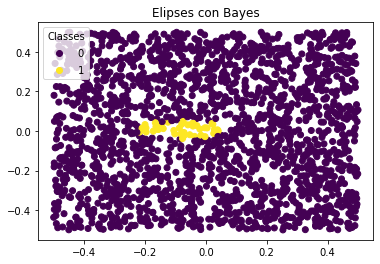

In [27]:
# Graficamos las predicciones para Bayes

x, y, pred = ej2_elipses()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Elipses con Bayes')
plt.show()


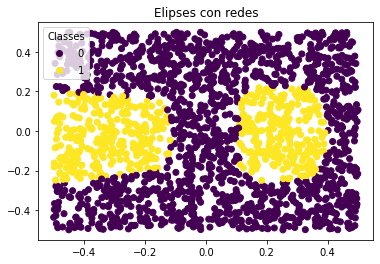

In [178]:
ann_x, ann_y, ann_pred = ej2_ann()
scatter = plt.scatter(ann_x, ann_y, c=ann_pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Elipses con redes')
plt.show()

### Análisis: elipses

Claramente podemos notar que el resultado obtenido con redes se acerca mucho más que el de bayes a la solución ideal. Para la predicción de bayes, se corrió repetidas veces y lo mejor que se pudo lograr es un gráfico como el que se muestra en la figura de más arriba que tiene forma de elipse. Pero no se llegó a observar ninguna ocasión en la que aparezca aunque sea un intento de hacer ambas elipses, de hecho, la mayoria de las veces solamente se observan puntos de una sola clase.

Con respecto a por qué observamos tan mala predicción, una posible teoría que viene a mi mente es que el modelo bayesiano clasifica computando probabilidades. Tal vez, como hay muchos más puntos que **no** pertenecen a las elipses, el clasificador ve 'más probable' que un punto dado no pertenezca a la elipse, obteniendo así graficas de predicción como las observadas en donde apenas podemos ver puntos amarrillos.

### Espirales Anidadas

In [28]:
def espirales_bayes():
    train = generate_points_c(500)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    clf = GaussianNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

In [156]:
def espirales_ann():
    train = generate_points_c(500)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    clf = pickle.load(open('ann/ej1-40.plk', 'rb'))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return X_test.loc[:, ['x']], X_test.loc[:, ['y']], y_pred

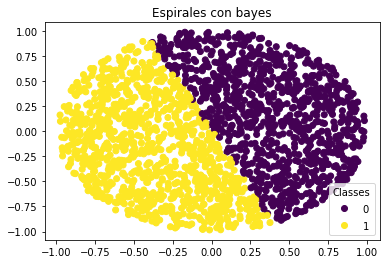

In [29]:
# Graficamos las predicciones

x, y, pred = espirales_bayes()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Espirales con bayes')
plt.show()

Text(0.5, 1.0, 'Espirales con redes')

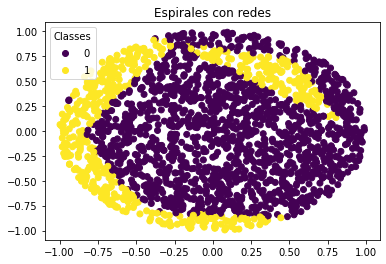

In [215]:
# Graficamos las predicciones

x, y, pred = espirales_ann()
scatter = plt.scatter(x, y, c=pred)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Espirales con redes')

### Análisis: espirales

En este caso ambos resultados son 'malos'. No es uno más destacable que el otro. La predicción de redes neuronales se realizó usando la mejor red obtenida en el tp anterior y como habíamos concluido allí, el resultado no puede mejorar mucho más que esto. 

Ahora, yendo a bayes, observamos que si corremos repetidas veces el código, la gráfica que se genera es, en esencia, la misma: tenemos la mitad de una clase de un lado y la otra del otro. En este caso, no sucede como en las elipses que es notoria la diferencia entre cantidades de puntos de una clase y de otra, sino que hay exactamente la misma cantidad (por la forma en la que generamos nuestros datos de entrenamiento). Con respecto a por qué se obtuvo un resultado así, no estoy segura de si aplica la misma teoría planteada que en elipses. Lo que si sospecho es que tiene que ver con la cantidad de ejemplos que hay de cada clase, que es exactamente la misma. Pero con respecto a por qué se dividen a la mitad casi de manera exacta los puntos de una clase y otra, no lo sé.

## Ejercicio 3

Realizamos a continuación la función que discretiza nuestras variables

In [33]:
def discretizar(X_train, y_train, X_val, y_val, X_test, y_test, nbins):
    errores_train = []
    errores_val = []
    errores_test = []
    best_bin = None
    best_error = None
    best_discretizador = None
    best_clf = None

    for nbin in nbins:
        disc = KBinsDiscretizer(n_bins=nbin, encode='ordinal', strategy='uniform')
        disc.fit(X_train)
        dX_train = disc.transform(X_train)
        dX_val = disc.transform(X_val)
        dX_test = disc.transform(X_test)

        clf = CategoricalNB(min_categories=nbin)
        clf.fit(dX_train, y_train)

        y_train_pred = clf.predict(dX_train)
        y_val_pred   = clf.predict(dX_val)
        y_test_pred  = clf.predict(dX_test)

        errores_train.append(1 - accuracy_score(y_train, y_train_pred))
        e_val = 1 - accuracy_score(y_val, y_val_pred)
        errores_val.append(e_val)
        errores_test.append(1 - accuracy_score(y_test, y_test_pred))

        if best_error is None or e_val < best_error:
            best_bin = nbin
            best_clf = clf
            best_discretizador = disc

        
    return errores_train, errores_val, errores_test, best_bin, best_discretizador, best_clf


## Ejercicio 4

In [ ]:
# Obtener los datos para elipses

def ej4_get_data():
    cols = ['x', 'y', 'Class']
    train = pd.read_csv('datasets/dos_elipses.data', names=cols)
    train_data = train.sample(500)

    X_train, X_val, y_train, y_val = train_test_split(
        train_data.loc[ : , ['x', 'y'] ], 
        train_data.loc[ : , ['Class'] ], 
        test_size=0.2, 
        random_state=0
    )

    test_data = pd.read_csv('datasets/dos_elipses.test', names=cols)

    return X_train, y_train, X_val, y_val, \
           test_data.loc[ : ,  ['x', 'y']],  \
           test_data.loc[ : ,  ['Class']]

    

In [30]:
# Obtener los datos de entrenamiento para espirales

def get_data_espirales():
    train = generate_points_c(400)
    val = generate_points_c(100)
    test = generate_points_c(2000)
    
    X_train = train.loc[:, ['x', 'y']]
    y_train = train.loc[:, ['Class']]

    X_val = val.loc[:, ['x', 'y']]
    y_val = val.loc[:, ['Class']]

    X_test = test.loc[:, ['x', 'y']]
    y_test = test.loc[:, ['Class']]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [50]:
# Training para elipses

def ej4_elipses():
    X_train, y_train, X_val, y_val, X_test, y_test = ej4_get_data()
    bins = list(range(2, 15))
    et, ev, ett, bb, bdisc, bclf = discretizar(X_train, y_train, X_val, y_val, X_test, y_test, bins)

    plt.plot(bins, et, label='train')
    plt.plot(bins, ev, label='validacion')
    plt.plot(bins, ett, label='test')
    plt.legend()

    return X_test, y_test, bb, bdisc, bclf

In [31]:
# Training para espirales

def ej4_espirales():
    X_train, y_train, X_val, y_val, X_test, y_test = get_data_espirales()
    bins = list(range(2, 15))
    et, ev, ett, bb, bdisc, bclf = discretizar(X_train, y_train, X_val, y_val, X_test, y_test, bins)

    plt.plot(bins, et, label='train')
    plt.plot(bins, ev, label='validacion')
    plt.plot(bins, ett, label='test')
    plt.title('Errores en espirales')
    plt.legend()

    return X_test, y_test, bb, bdisc, bclf

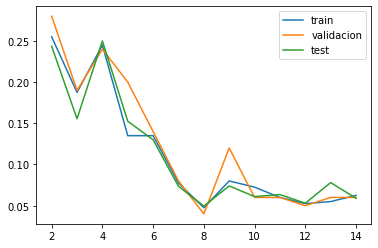

In [55]:
# Graficamos los errores para el problema de las elipses
X_test, y_test, best_bin, best_disc, best_clf = ej4_elipses()

Text(0.5, 1.0, 'Predicciones para elipses')

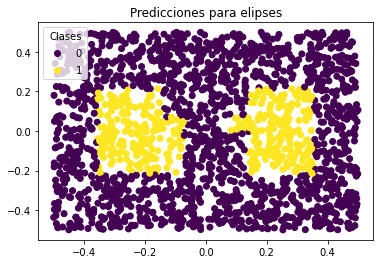

In [56]:
# Graficamos las predicciones sobre el conjunto de test
dX_test = best_disc.transform(X_test)
y_pred = best_clf.predict(dX_test)

scatter = plt.scatter(X_test.loc[:, ['x']], X_test.loc[:, ['y']], c=y_pred)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title('Predicciones para elipses')


### Análisis espirales

En la gráfica de arriba podemos ver que las predicciones mejoraron notablemente a comparación del ejercicio 2. Podemos notar claramente las dos elipses. Con respecto a la cantidad de bines, se probó aumentar la cantidad de los mismos pero no se notaron mejoras significativas en el error, e incluso ocurrieron algunos casos donde las curvas de error comienzan a tener más picos. Por lo tanto, aumentar la cantidad de bins a usar no implica directamente que se vaya a obtener una mejor predicción que la observada. Con respecto al sobreajuste, podemos ver en las gráficas de error que las 3 lineas están bastante juntas y siguen mas o menos el mismo patrón, por lo que concluimos que no se observa sobreajuste.

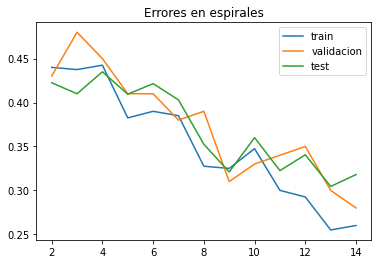

In [43]:
# Graficamos los errores para el problema de las espirales
eX_test, ey_test, ebest_bin, ebest_disc, ebest_clf = ej4_espirales()

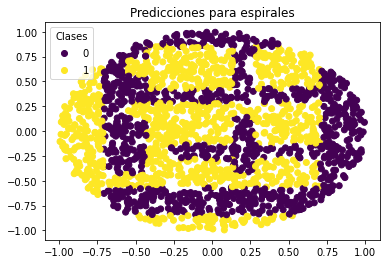

In [46]:
# Graficamos las predicciones sobre el conjunto de test
edX_test = ebest_disc.transform(eX_test)
ey_pred = ebest_clf.predict(edX_test)

scatter = plt.scatter(eX_test.loc[:, ['x']], eX_test.loc[:, ['y']], c=ey_pred)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title('Predicciones para espirales')
plt.show()

### Análisis espirales

En este caso, al contrario que en lo visto en elipses, no se ve una gran mejora. Las curvas de error están casi siempre por encima de 0.25/0.3. Podemos ver que si corremos repetidas veces, estas 'pegan más saltos' que las curvas de error de las elipses. El sobreajuste, si hay, no se ve en todos los casos, en la gráfica lograda más arriba podemos ver que tal vez puede comenzar a haber un pequeño sobreajuste a partir de los 12 bins en adelante pero no es tan notorio.

En este caso se probó aumentar la cantidad de bines también, e incluso proveerle más datos para entrenar. Pero la clasificación no mejora, e incluso en algunos casos aumentar la cantidad de bines lo empeora. Por lo tanto, al igual que en elipses, concluimos que aumentar la cantidad de bines no implica directamente que nuestro modelo mejorará. El modelo bayesiano para el problema de las espirales no resulta ser una de las mejores opciones.

## Ejercicio 5

In [3]:
def ej5():
    X, y = fetch_20newsgroups(subset="train", return_X_y=True, remove=["headers"])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
    X_test, y_test = fetch_20newsgroups(subset="test", return_X_y=True, remove=["headers"]) 

    alfas = [10 ** (-i) for i in range(0, 5)]
    lens = [1000, 2000, 3000, 4000]

    e_train = e_val = e_test = []
    best_val = None
    best_test_error = None
    best_train_error = None
    best_clf = None
    best_len = None
    best_bin = None
    best_alfa = None
    matrix = None

    for l in lens:
        for alfa in alfas:
            largo_diccionario = l

            vec = CountVectorizer(stop_words='english', max_features=largo_diccionario)

            Xvec_train = vec.fit_transform(X_train).toarray()
            Xvec_test = vec.transform(X_test).toarray()
            Xvec_val = vec.transform(X_val).toarray()
            
            clf = MultinomialNB(alpha=alfa)
            clf.fit(Xvec_train, y_train)

            y_train_pred = clf.predict(Xvec_train)
            y_test_pred = clf.predict(Xvec_test)
            y_val_pred = clf.predict(Xvec_val)

            error_train = 1 - accuracy_score(y_train, y_train_pred)
            e_train.append(error_train)
            error_val = 1 - accuracy_score(y_val, y_val_pred)
            e_val.append(error_val)
            error_test = 1 - accuracy_score(y_test, y_test_pred)
            e_test.append(error_test)

            if best_val is None or error_val < best_val:
                best_val = error_val
                best_clf = clf
                best_len = largo_diccionario
                best_alfa = alfa
                best_test_error = error_test
                best_train_error = error_train
                matrix = confusion_matrix(y_test, y_test_pred)
    return e_train, e_val, e_test, best_clf, best_len, best_alfa, best_val, best_test_error, best_train_error, matrix

            

In [4]:
e_train, e_val, e_test, best_clf, best_len, best_alfa, best_val, test_error, train_error, matrix = ej5()
print(f'Mejor alfa: {best_alfa} con longitud de dic {best_len} y un error de validación de {best_val}')

Mejor alfa: 0.1 con longitud de dic 4000 y un error de validación de 0.23223753976670203


In [5]:
# Overfitting 

print(f'Error de entrenamiento: {train_error}')
print(f'Error de trest: {test_error}')

Error de entrenamiento: 0.1355332940483206
Error de trest: 0.2939458311205523


Para analizar el sobreajuste, comparamos los valores obtenidos para el error de entrenamiento y el de test. Es más díficil analizarlo de esta forma sin ver el comportamiento de las curvas de error, pero viendo los números obtenidos, si bien esta diferencia podría ser más chica tampoco es tan grande. Es probable que haya un poco de sobreajuste. Se probaron también valores para el tamaño del diccionario más grandes que 4000 (6000) y si bien disminuyeron apenas un poco los valores para el error, la diferencia entre ambos valores se mantuvo prácticamente igual, por lo que esto indicaría que aumentar el largo del diccionario puede llegar a ayudar a disminuir el error sin producir más sobreajuste. 

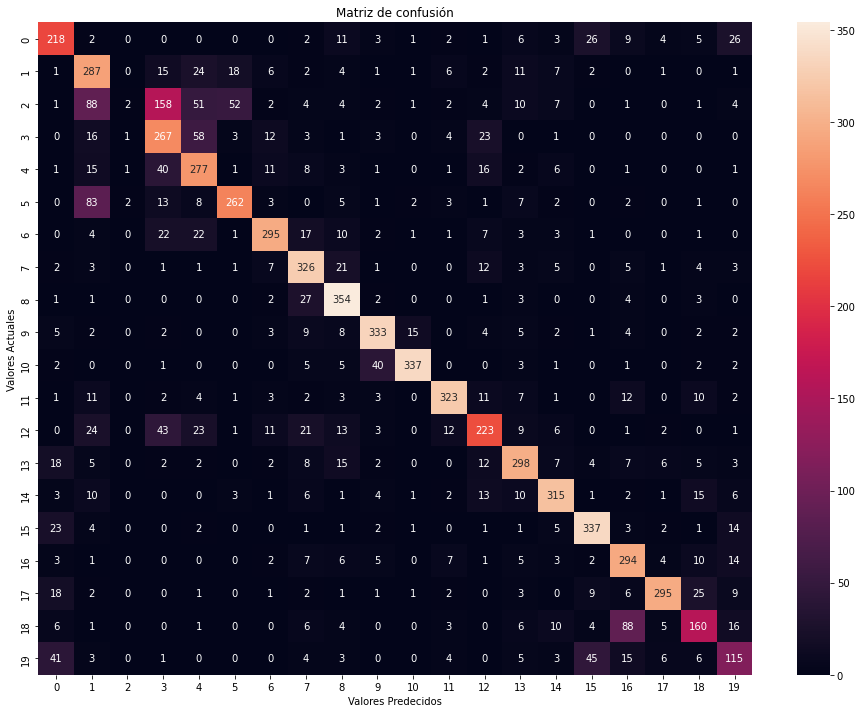

In [7]:
# Matriz de confusión

matrix_df = pd.DataFrame(matrix)
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True, fmt='g')
plt.title('Matriz de confusión')
plt.ylabel('Valores Actuales')
plt.xlabel('Valores Predecidos')
plt.show()

En la matriz de confusión podemos ver que la diagonal contiene mayor concentración de valores. Esto es bueno ya que esta disposición indica que la mayoría fueron bien predecidos. De todas formas podemos observar una considerable cantidad de celdas (sobre todo cerca de la diagonal) donde se ve que hay datos de una clase que fueron predecidos como si fueran de otra clase. Estas celdas son mayormente visibles al principio (posición (3, 2) aproximadamente), y al final de la diagonal (posición (16, 18)). Por lo tanto pareciera ser que la mayor dificultad de nuestro clasificador radica en clasificar bien las primeras y últimas clases. Las clases del medio de la diagonal se mantienen bastante equilibradas con respecto a la cantidad de predicciones erróneas.

## Ejercicio 6